# **Business Case : Descriptive Statistics & Probability**


- The market research team wants to **identify the characteristics of the target audience for each type of treadmill** offered by the company, to provide a better recommendation of the treadmills to the new customers.

- The team decides to **investigate whether there are differences across the product with respect to customer characteristics**.


# Data Pre-Processing

### Analysis of Basic Metrics

Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import math

Reading the dataset

In [ ]:
df = pd.read_csv("data.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


Number of Rows, Columns in the dataset

In [ ]:
df.shape

(180, 9)

Getting datatypes for each column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Display all the columns

In [ ]:
df.keys()

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

Getting Unique Values for each column

In [ ]:
cols = df.keys()
for col in cols:
    unique_vals = df[col].unique()
    print(f"{col}: {unique_vals}")

Product: ['KP281' 'KP481' 'KP781']
Age: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
Gender: ['Male' 'Female']
Education: [14 15 12 13 16 18 20 21]
MaritalStatus: ['Single' 'Partnered']
Usage: [3 2 4 5 6 7]
Fitness: [4 3 2 1 5]
Income: [ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]
Miles: [112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]


Statistical Summary

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Handling Null-values


In [ ]:
df.isnull().sum()
# As we can see there are 'No' Null-values

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Checking for Unique Values for each column

In [ ]:
df.duplicated().sum()
# No duplicate values are present

0

Creating different Income Groups by adding new column

In [ ]:
income_range = (df['Income'].min(), df['Income'].max())
n_groups = 4

bin_edges = pd.cut(x=income_range, bins=n_groups, retbins=True, right=False)[1]

group_labels = ['Low-Income', 'Medium-Income', 'High-Income', 'Very High-Income']

df['IncomeGroup'] = pd.cut(df['Income'], bins=bin_edges, labels=group_labels, right=False)

Creating different Age Groups by adding new column

In [ ]:
age_range = (df['Age'].min(), df['Age'].max())
n_groups = 4

bin_edges = pd.cut(x=age_range, bins=n_groups, retbins=True, right=False)[1]

group_labels = ['Youth', 'Young Adult', 'Adult', 'Middle Age']

df['AgeGroup'] = pd.cut(df['Age'], bins=bin_edges, labels=group_labels, right=False)

# Exploratory Data Analysis

## Univariate Analysis

In [ ]:
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,IncomeGroup,AgeGroup
0,KP281,18,Male,14,Single,3,4,29562,112,Low-Income,Youth
1,KP281,19,Male,15,Single,2,3,31836,75,Low-Income,Youth
2,KP281,19,Female,14,Partnered,4,3,30699,66,Low-Income,Youth
3,KP281,19,Male,12,Single,3,3,32973,85,Low-Income,Youth
4,KP281,20,Male,13,Partnered,4,2,35247,47,Low-Income,Youth
5,KP281,20,Female,14,Partnered,3,3,32973,66,Low-Income,Youth
6,KP281,21,Female,14,Partnered,3,3,35247,75,Low-Income,Youth
7,KP281,21,Male,13,Single,3,3,32973,85,Low-Income,Youth
8,KP281,21,Male,15,Single,5,4,35247,141,Low-Income,Youth
9,KP281,21,Female,15,Partnered,2,3,37521,85,Low-Income,Youth


### Sales Distribution by Product, Gender, and Marital Status

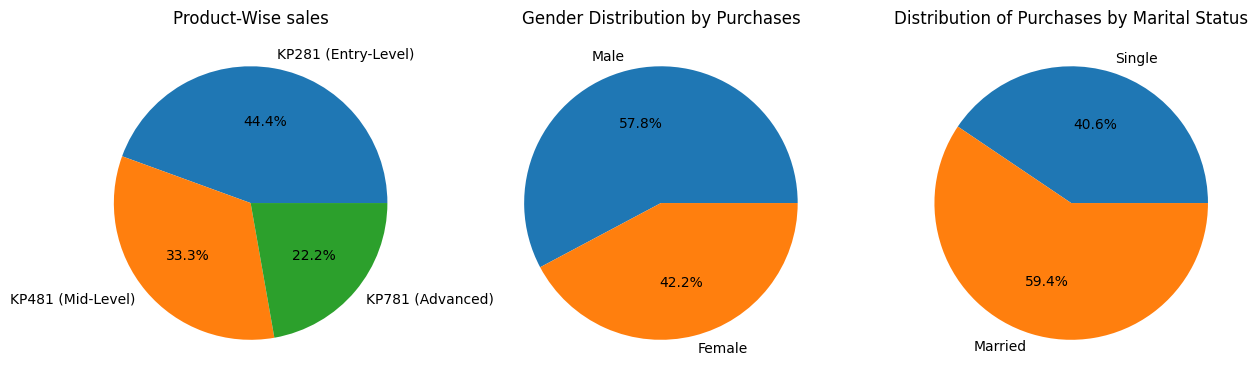

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 10))

# Plot 1: Product Distribution by Type
labels = ['KP281 (Entry-Level)', 'KP481 (Mid-Level)', 'KP781 (Advanced)']
sizes = [df.loc[df['Product'] == 'KP281'].shape[0], df.loc[df['Product'] == 'KP481'].shape[0], df.loc[df['Product'] == 'KP781'].shape[0]]
axs[0].pie(sizes, labels=labels, autopct='%1.1f%%')
axs[0].set_title('Product-Wise sales')

# Plot 2: Gender Distribution by Purchases
gender_counts = df['Gender'].value_counts()
axs[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
axs[1].set_title('Gender Distribution by Purchases')

# Plot 3: Distribution of Purchases by Marital Status
labels = ['Single', 'Married']
sizes = [df.loc[df['MaritalStatus'] == 'Single'].shape[0], df.loc[df['MaritalStatus'] == 'Partnered'].shape[0]]
axs[2].pie(sizes, labels=labels, autopct='%1.1f%%')
axs[2].set_title('Distribution of Purchases by Marital Status')

plt.show()

- KP281 is the most purchased product followed by KP481 and KP781
- More purchases are made by male customers
- Most of the purchases are made by customers who are married

### Column-Wise Spread of Data

In [ ]:
def plot_column(df, column, figsize=(12, 6)):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

    sns.histplot(df[column], kde=False, ax=ax1)

    sns.violinplot(x=df[column], ax=ax2, color='#79f79b')

    fig.suptitle(f'Spread of Data for {column}')

    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]

    ax1.axvline(mean, color='red', label='Mean')
    ax1.axvline(median, color='green', label='Median')
    ax1.axvline(mode, color='blue', label='Mode')
    ax2.axvline(mean, color='red', label='Mean')
    ax2.axvline(median, color='green', label='Median')
    ax2.axvline(mode, color='blue', label='Mode')

    ax1.text(mean + 0.5, 10, f"Mean: {mean:.2f}", color='red')
    ax1.text(median + 0.5, 20, f"Median: {median:.2f}", color='green')
    ax1.text(mode + 0.5, 30, f"Mode: {mode:.2f}", color='blue')
    ax2.text(mean + 0.5, 0.4, f"Mean: {mean:.2f}", color='red')
    ax2.text(median + 0.5, 0.3, f"Median: {median:.2f}", color='green')
    ax2.text(mode + 0.5, 0.2, f"Mode: {mode:.2f}", color='blue')

    ax1.legend()

    plt.tight_layout()
    plt.show()

#### Spread of data for Age

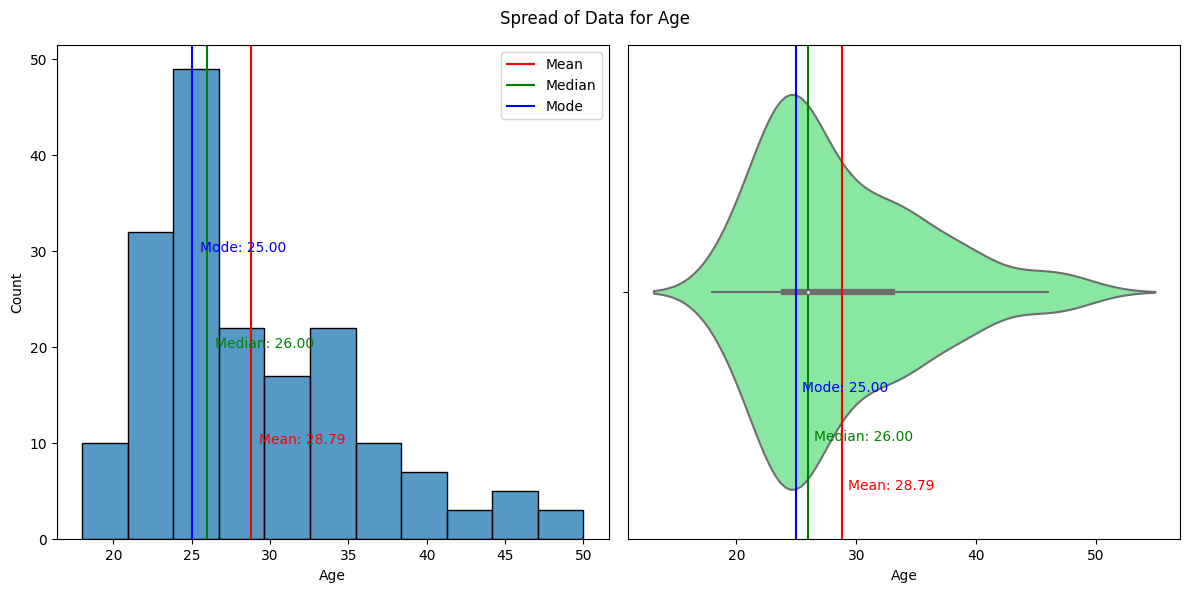

In [ ]:
plot_column(df, 'Age', figsize=(12, 6))

- Mean age is 25
- Median age is 26
- There are more customers between the ages 22 - 30

#### Spread of data for Education

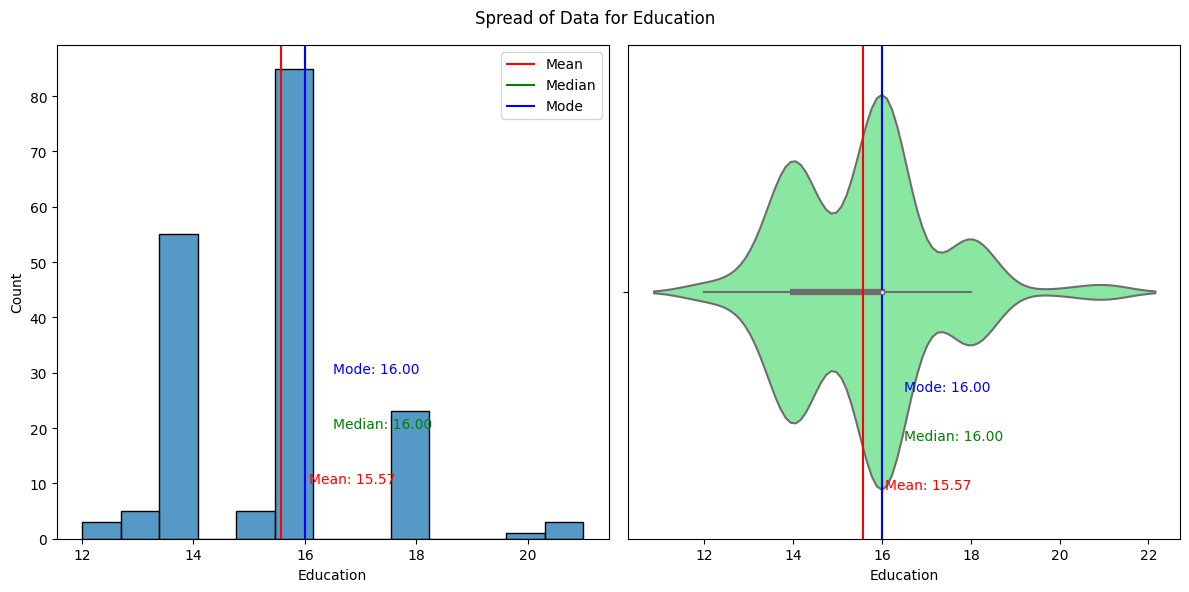

In [ ]:
plot_column(df, 'Education', figsize=(12, 6))

- Majority of the customers have 16 yrs in Education

#### Spread of data for Income

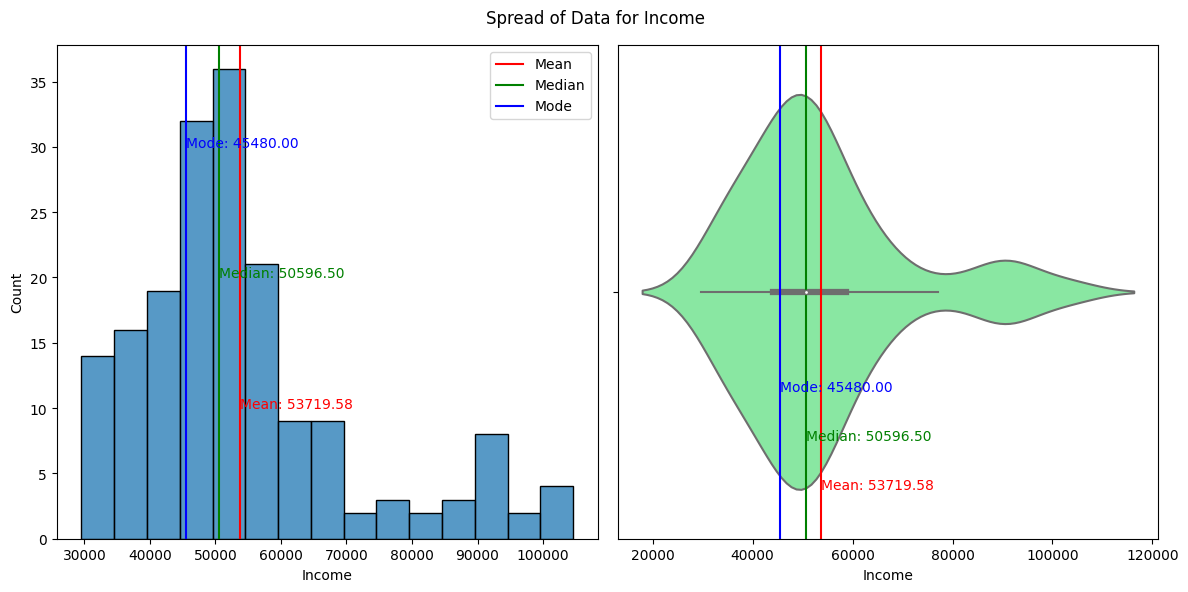

In [ ]:
plot_column(df, 'Income', figsize=(12, 6))

- The Mean Income of customers is 53719.58 with the most common Income being 45480
- Majority of the customers lie in the Income range of 45 K - 55 K

#### Spread of data for Usage

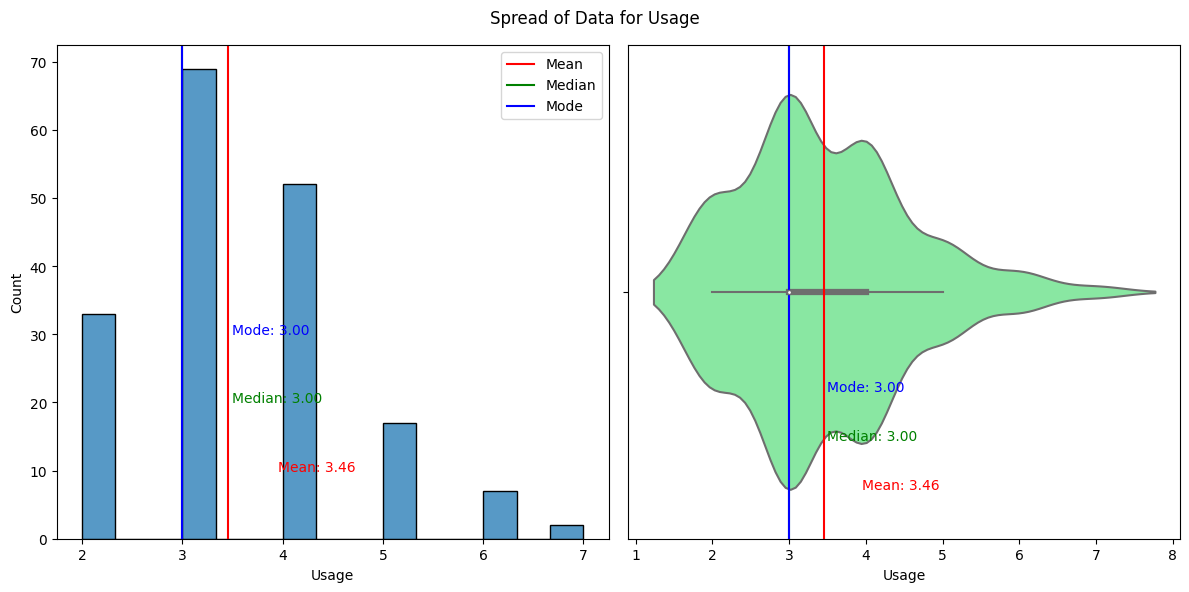

In [ ]:
plot_column(df, 'Usage', figsize=(12, 6))

- Most of the customers plan to use the treadmill on an average of 3 times per week.

#### Spread of data for Fitness

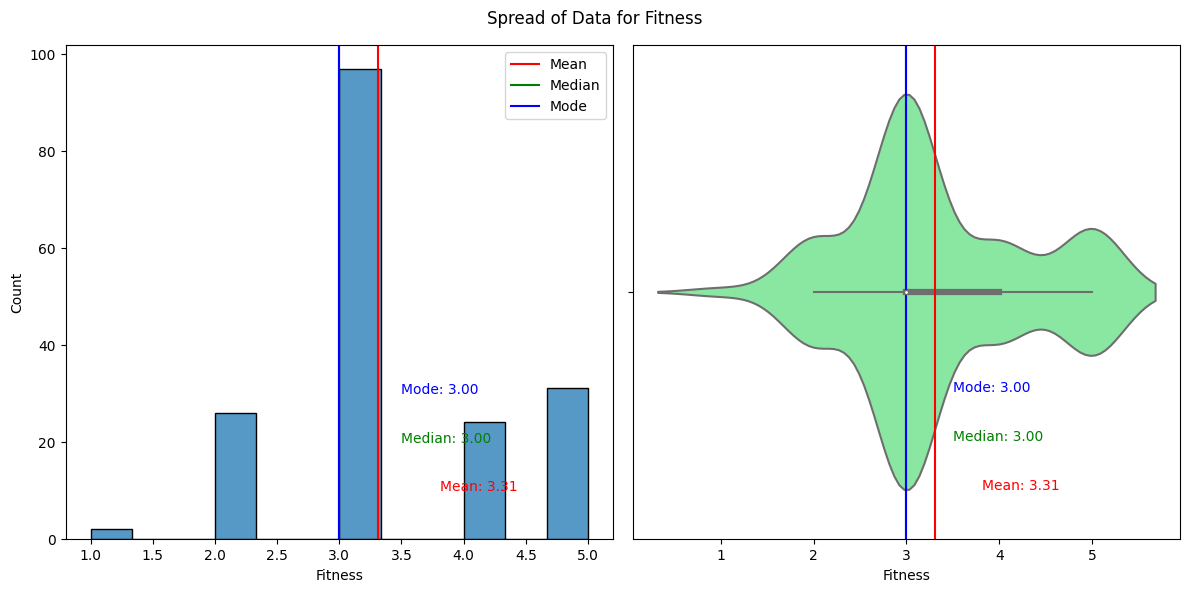

In [ ]:
plot_column(df, 'Fitness', figsize=(12, 6))

- Most of the customers who purchased products, self- rate themselves a 3 on a scale of 1 - 5

#### Spread of data for Miles

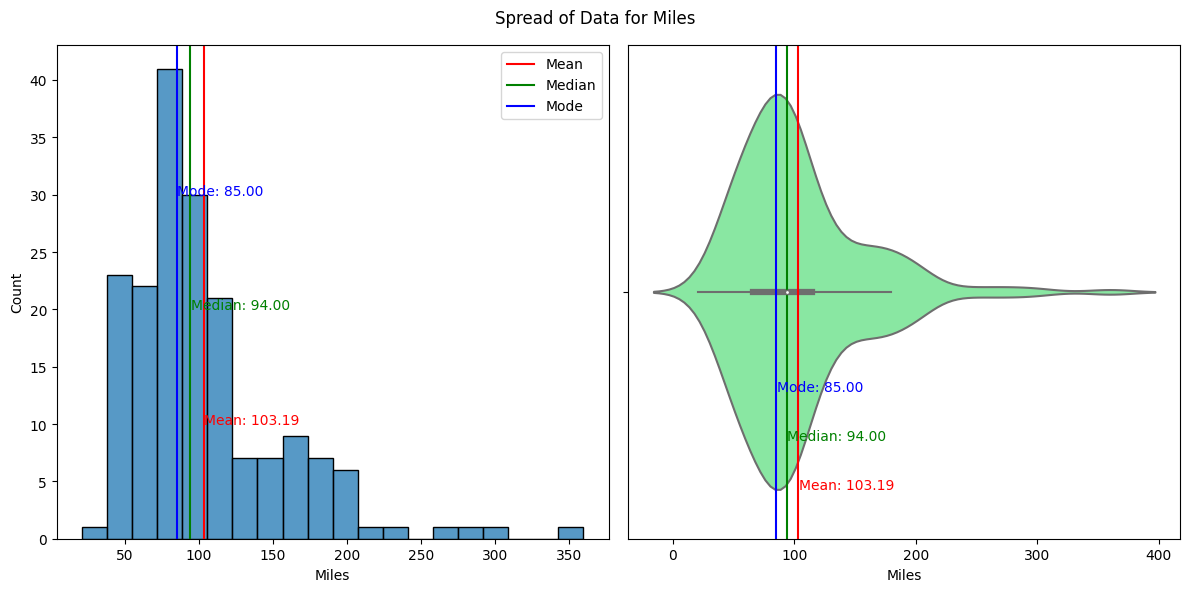

In [ ]:
plot_column(df, 'Miles', figsize=(12, 6))

- The Median Miles the customers expect to cover is around 94 miles
- Most of the customers expect to cover around 85 miles

## Bivariate Analysis

### Gender Distribution by Product Type


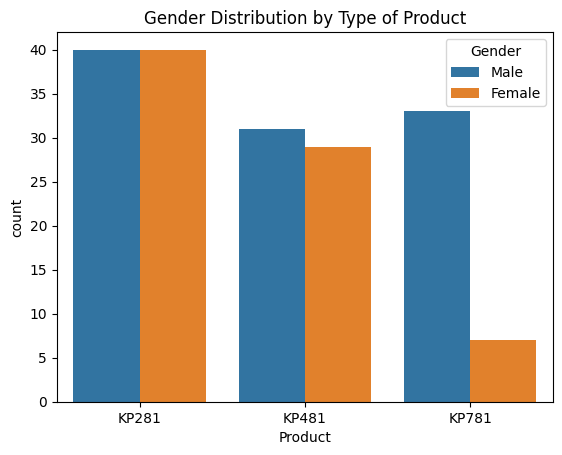

In [ ]:
# Gender Distribution by Product Type
sns.countplot(data = df, x = 'Product', hue='Gender')
plt.title('Gender Distribution by Type of Product')
plt.show()

- Both Male and Female customers purchased the product KP281 equally
- In case of products KP481 nad KP781, Males purchased more than Females

### Distribution of Customers by Martital Status for each product

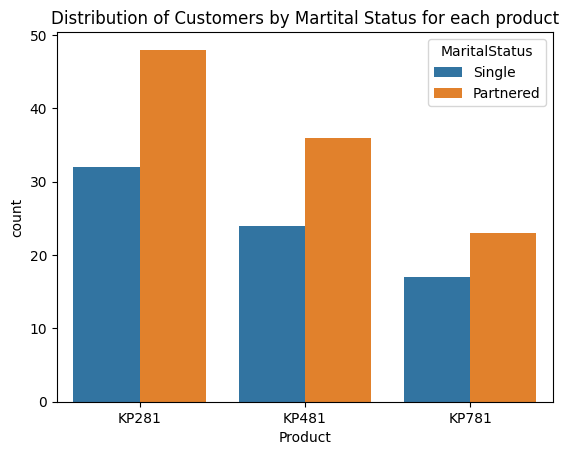

In [ ]:
# Distribution of Customers by Martital Status for each product
sns.countplot(data = df, x = 'Product', hue='MaritalStatus')
plt.title('Distribution of Customers by Martital Status for each product')
plt.show()

- The customers who bought these products, majority of them are Partnered

### Distribution of Customers by Age Group

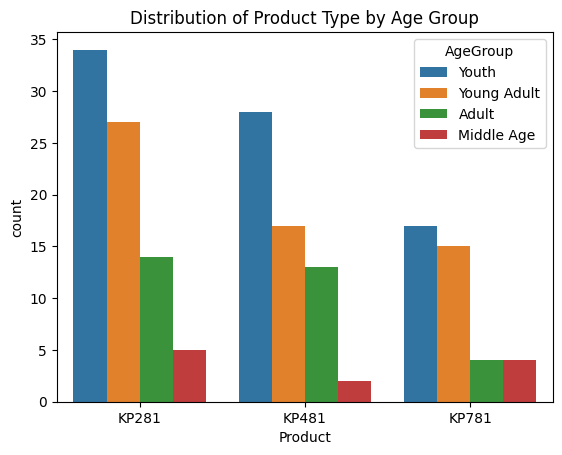

In [ ]:
# Distribution of Product Type by Age Group
sns.countplot(data = df, x = 'Product', hue='AgeGroup')
plt.title('Distribution of Product Type by Age Group')
plt.show()

- For the product KP281 and KP481, most of the customers belong to the age groups of ' Youth ' and ' Young Adult ' and ' Middle Age '

### Distribution of Customers by Income Group

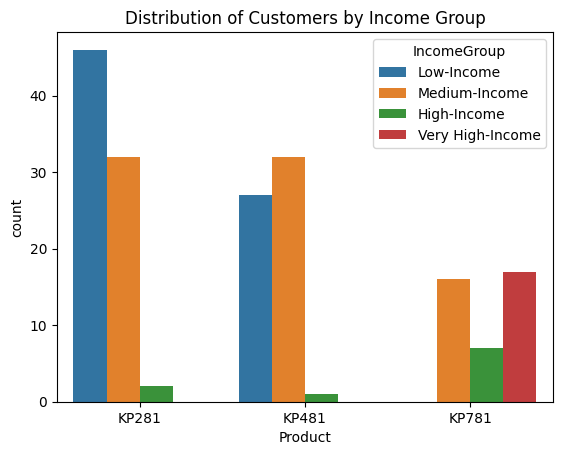

In [ ]:
# Distribution of Customers by Income Group
sns.countplot(data = df, x = 'Product', hue='IncomeGroup')
plt.title('Distribution of Customers by Income Group')
plt.show()

- The Customers who bought KP281 or KP481 most of them belong to either 'Low-Income' or 'Medium-Group' group
- The Customers who bought KP781, most of them belong to either 'Very High Income' group

### Correlation Heatmap

<ipython-input-26-41c0c315df1b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Blues')


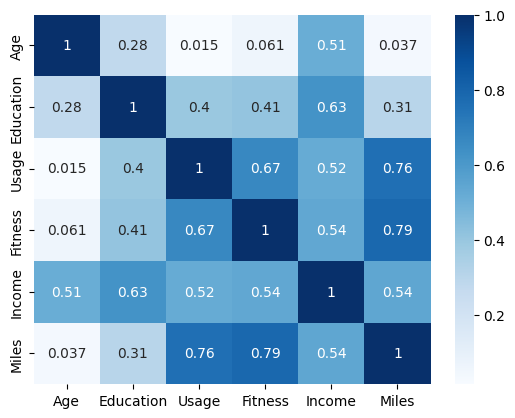

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

- Usage and Miles are correlated
- Fitness and Miles are correlated
- Fitness and usage are also correlated
- Income and Education are correlated

### Comparison of Product Attributes

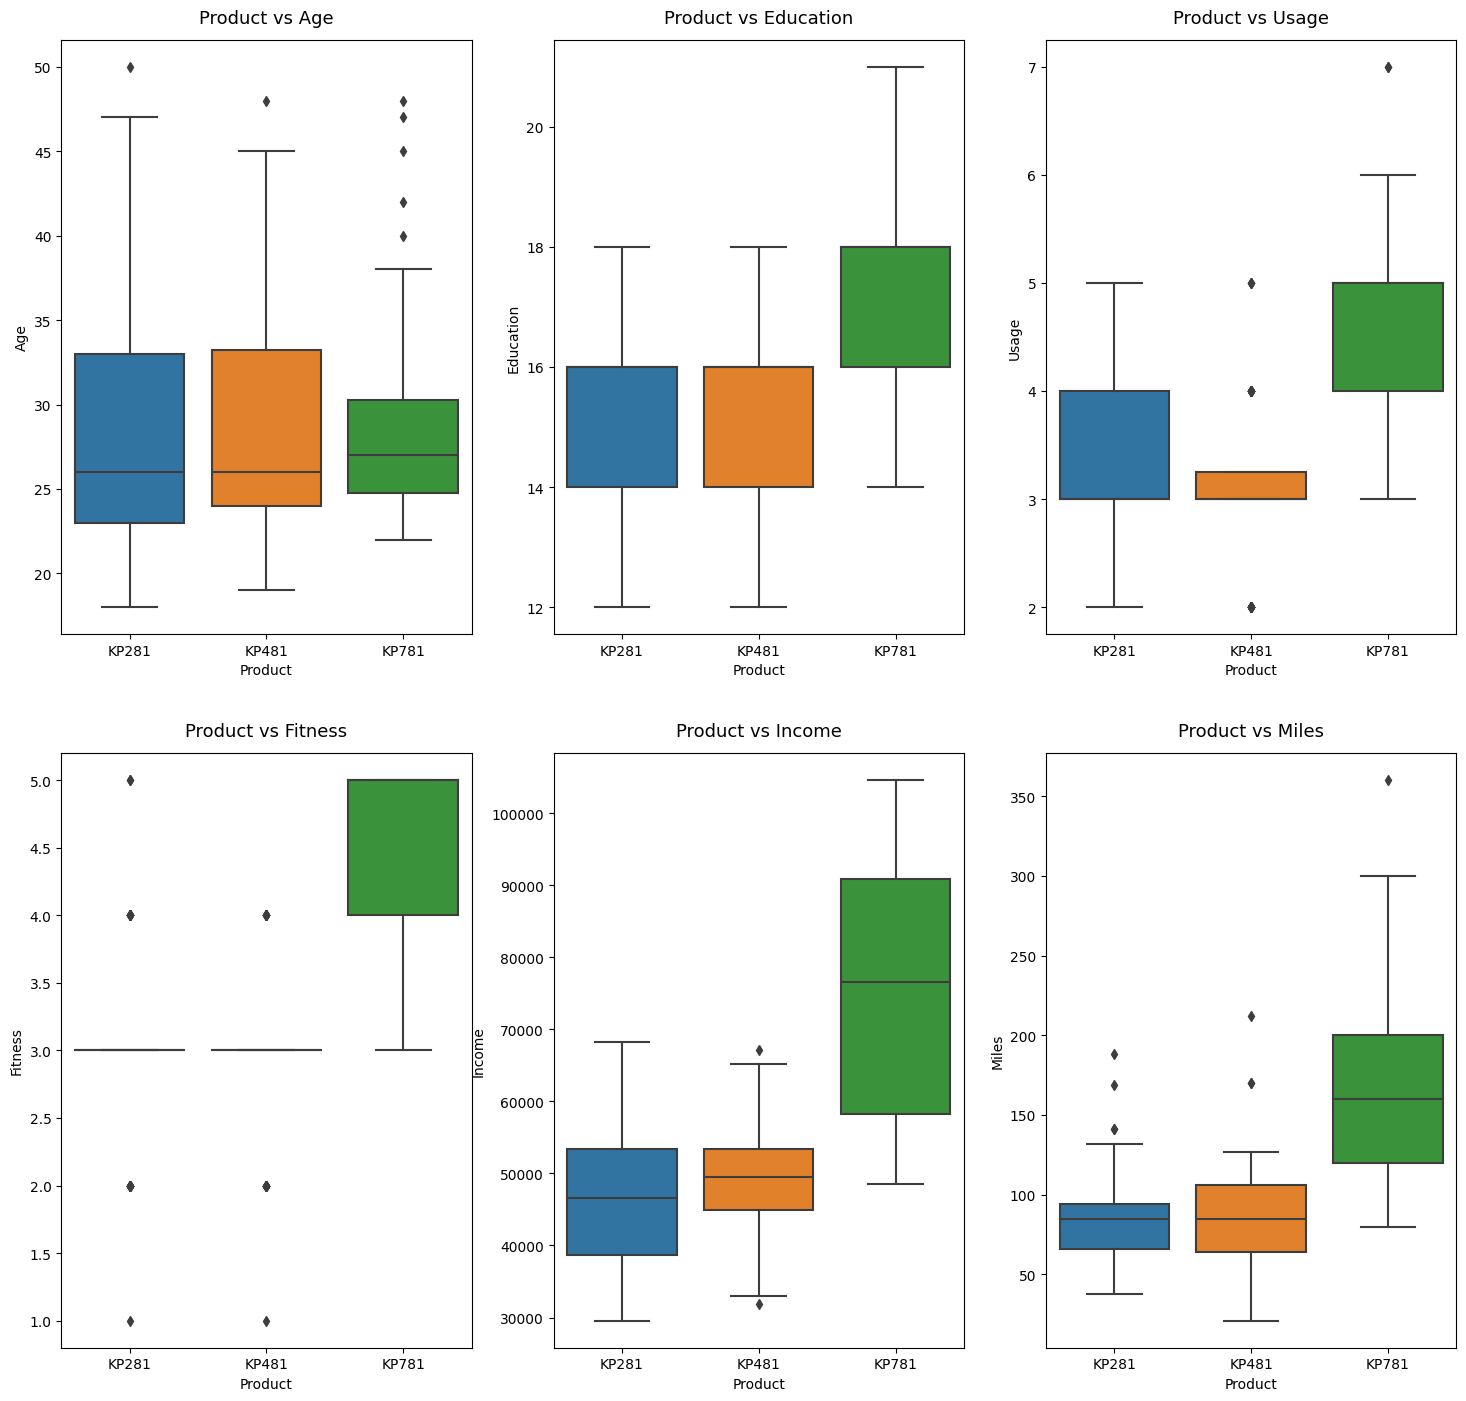

In [ ]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=attrs[count], ax=axs[i,j])
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1

- People who purchased KP281 & KP481 have the same median age
- There are more outliers in age for the product KP781, customers more than the age of 40
- People who purchased KP281 and KP481 have the same median value for number of expected miles covered each week and the cutomers who bought KP781 expect to cover anywhere between 100 - 200
- Age of customers buying KP281 and KP481 is between 20-35, where as customers buying KP781 are primarily in 25 - 30
- Customers with lower Income purchased KP281 and KP481 and customers with higher Income purchased KP781
- Customer with KP281 expect to use treadmill 3 - 4 times a week and an average self rated fitness is 2.96
- Customers who purchased KP781 have a self-rated themselves between 4 - 5
- Customers who bought KP481 model expecting to use Treadmill less frequently but to run more miles a week.
- Customer who bought KP781 plan to use it more frequently , run more miles and have high self rated fitness .They seem to be more health conscious or professionals.
- Customers who purchased KP281 & KP481, have an education of 14 - 16 years and those who bought KP781 have 16 - 18 years of education

### Gender vs Other Attributes

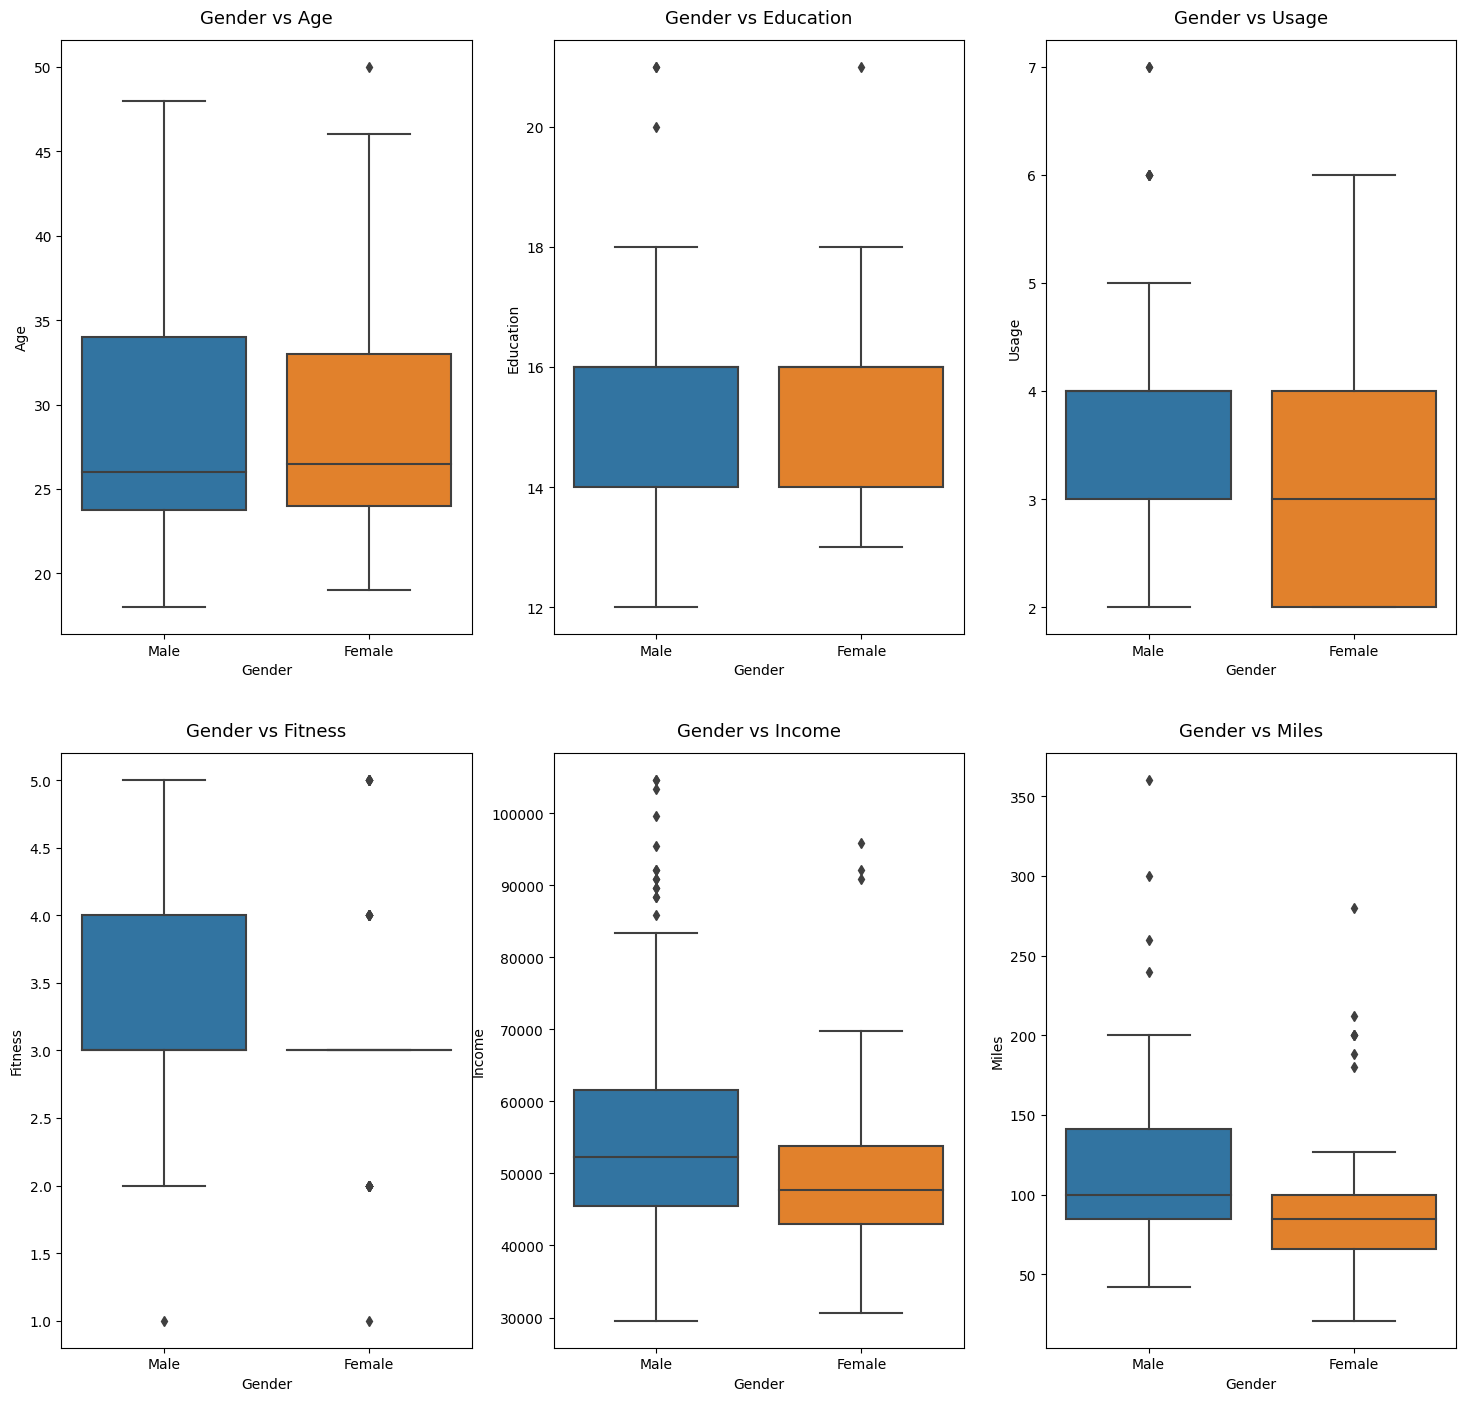

In [ ]:
attrs1 = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Gender', y=attrs1[count], ax=axs[i,j])
        axs[i,j].set_title(f"Gender vs {attrs1[count]}", pad=12, fontsize=13)
        count += 1

- Most of the Male customers, have ages between 23 - 35 and Females have age range between 23-33
- Expected Usage and miles covered is less in Female customers than male customers
- Education of Male and Female customers is same.
- Males plan to use the product 3 - 4 a week and Females plan to use the product 2 - 4 times a week

### Marital Status vs Other Attributes

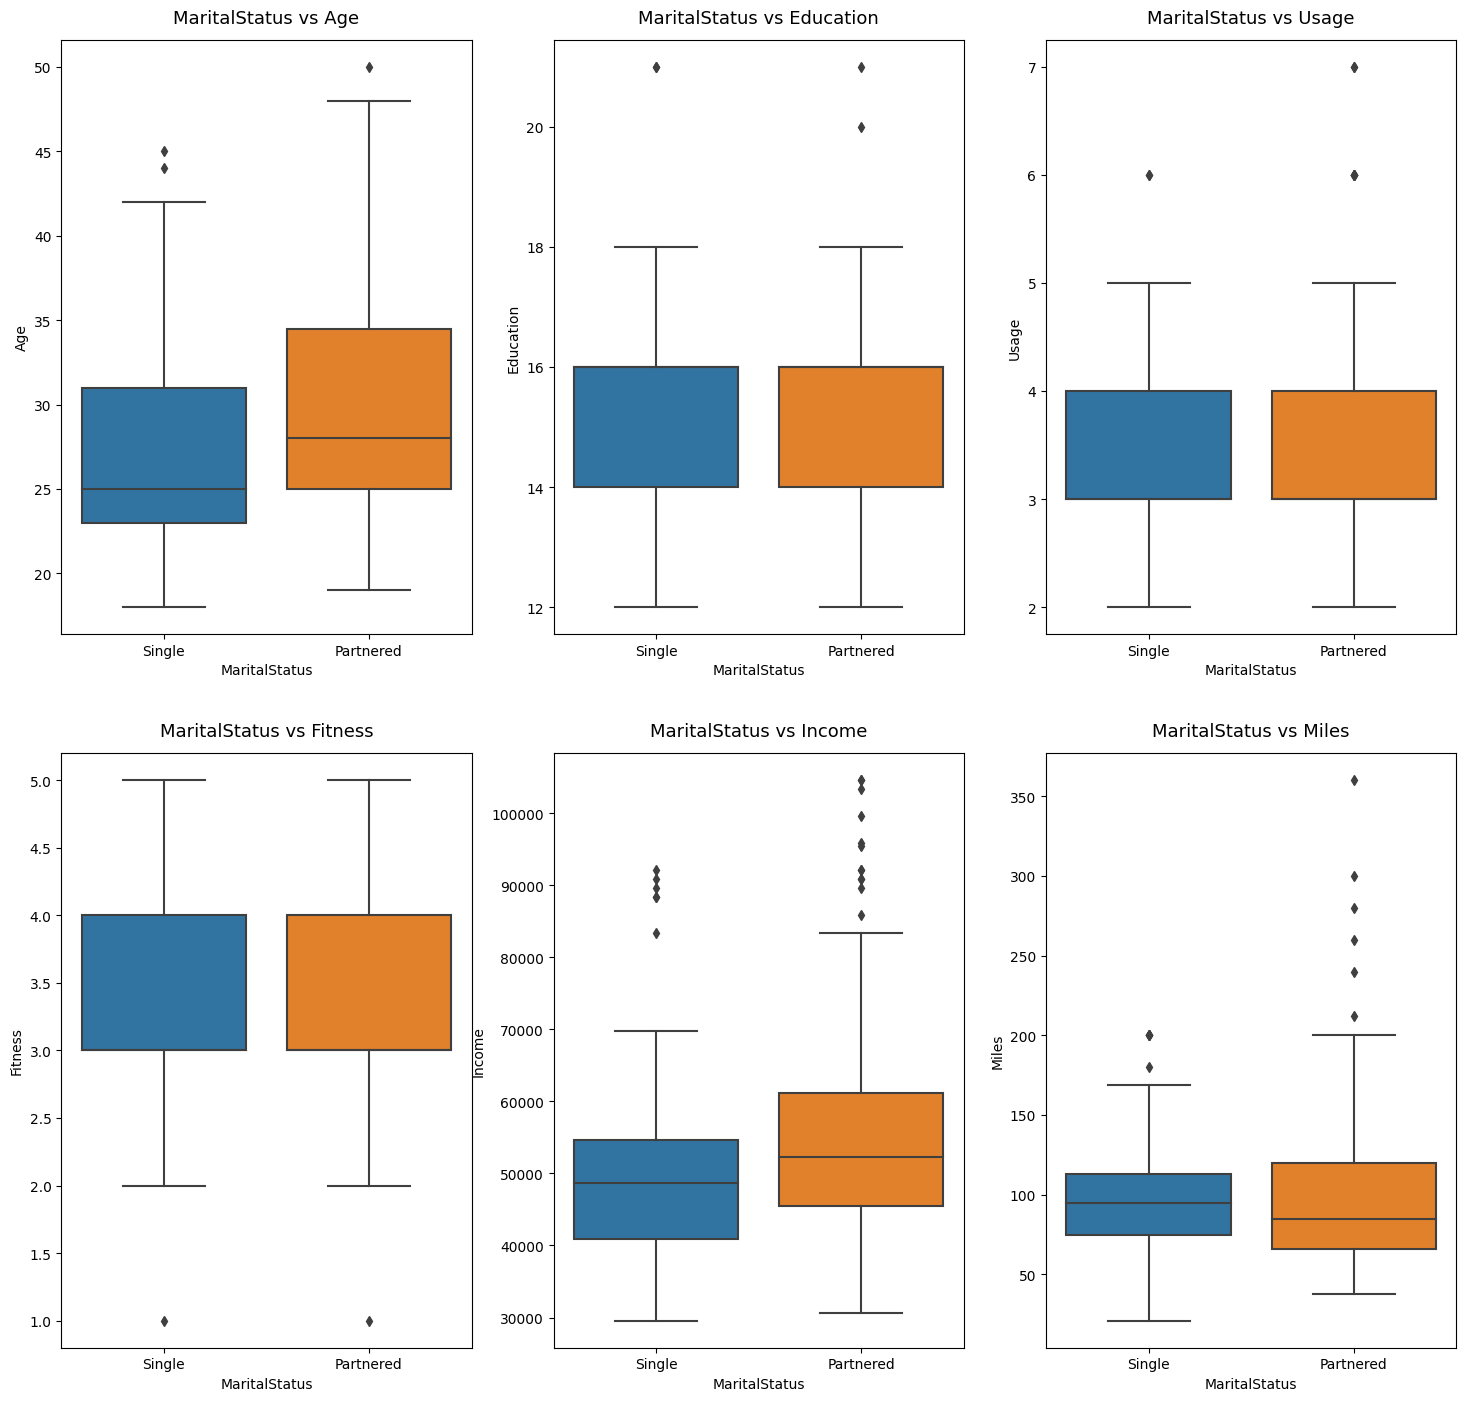

In [ ]:
attrs2 = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='MaritalStatus', y=attrs2[count], ax=axs[i,j])
        axs[i,j].set_title(f"MaritalStatus vs {attrs2[count]}", pad=12, fontsize=13)
        count += 1

- Customers in a partnership expect to run more miles than single customers.
- Partnered customers have a higher income than single customers.
- Partnered customers are older than single customers.
- The self-rated fitness of both partnered and single customers is the same.
- The education level of both partnered and single customers is the same.

### Income by Education and Product

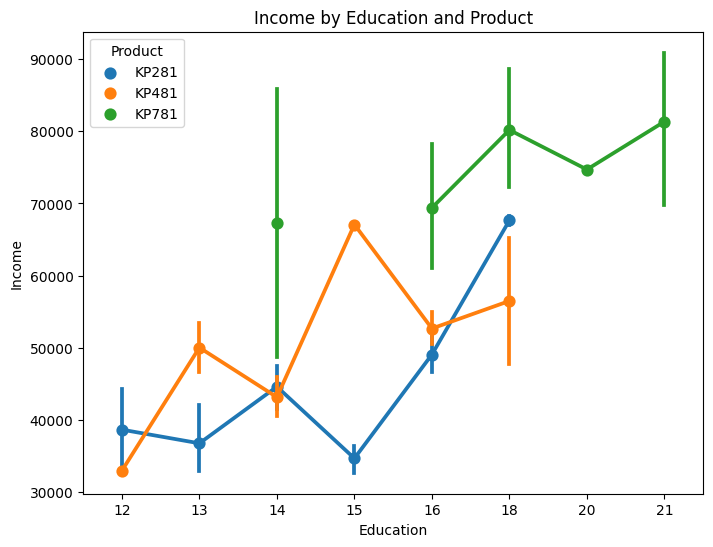

In [ ]:
plt.figure(figsize=(8,6))
sns.pointplot(x=df["Education"],y=df["Income"],hue=df['Product']).set(title='Income by Education and Product')
plt.show()

- There is a positive correlation between Education and Income
- The customers who bought KP781, are more educated and have higher incomes

## Multivariate Analysis

### Age vs Income by Product and Usage

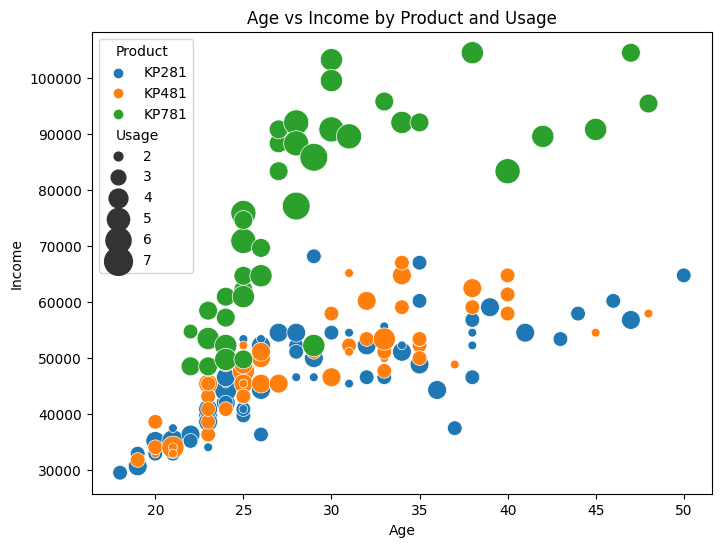

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Age", y="Income", hue="Product",
        size='Usage', sizes=(40, 400), data=df).set(title = "Age vs Income by Product and Usage")
plt.show()

- Products KP281 and KP481 are bought by people with lower than 70K as income and age is concentrated more in range of 23-35
- Product KP781 is mainly bought by people with higher than 70K income and age falls in range of 23-30.
- Majority of people who buys the KP781 expect that they will run more than consumers of the other two products on average

### Product and Gender Differences in Customer Attributes

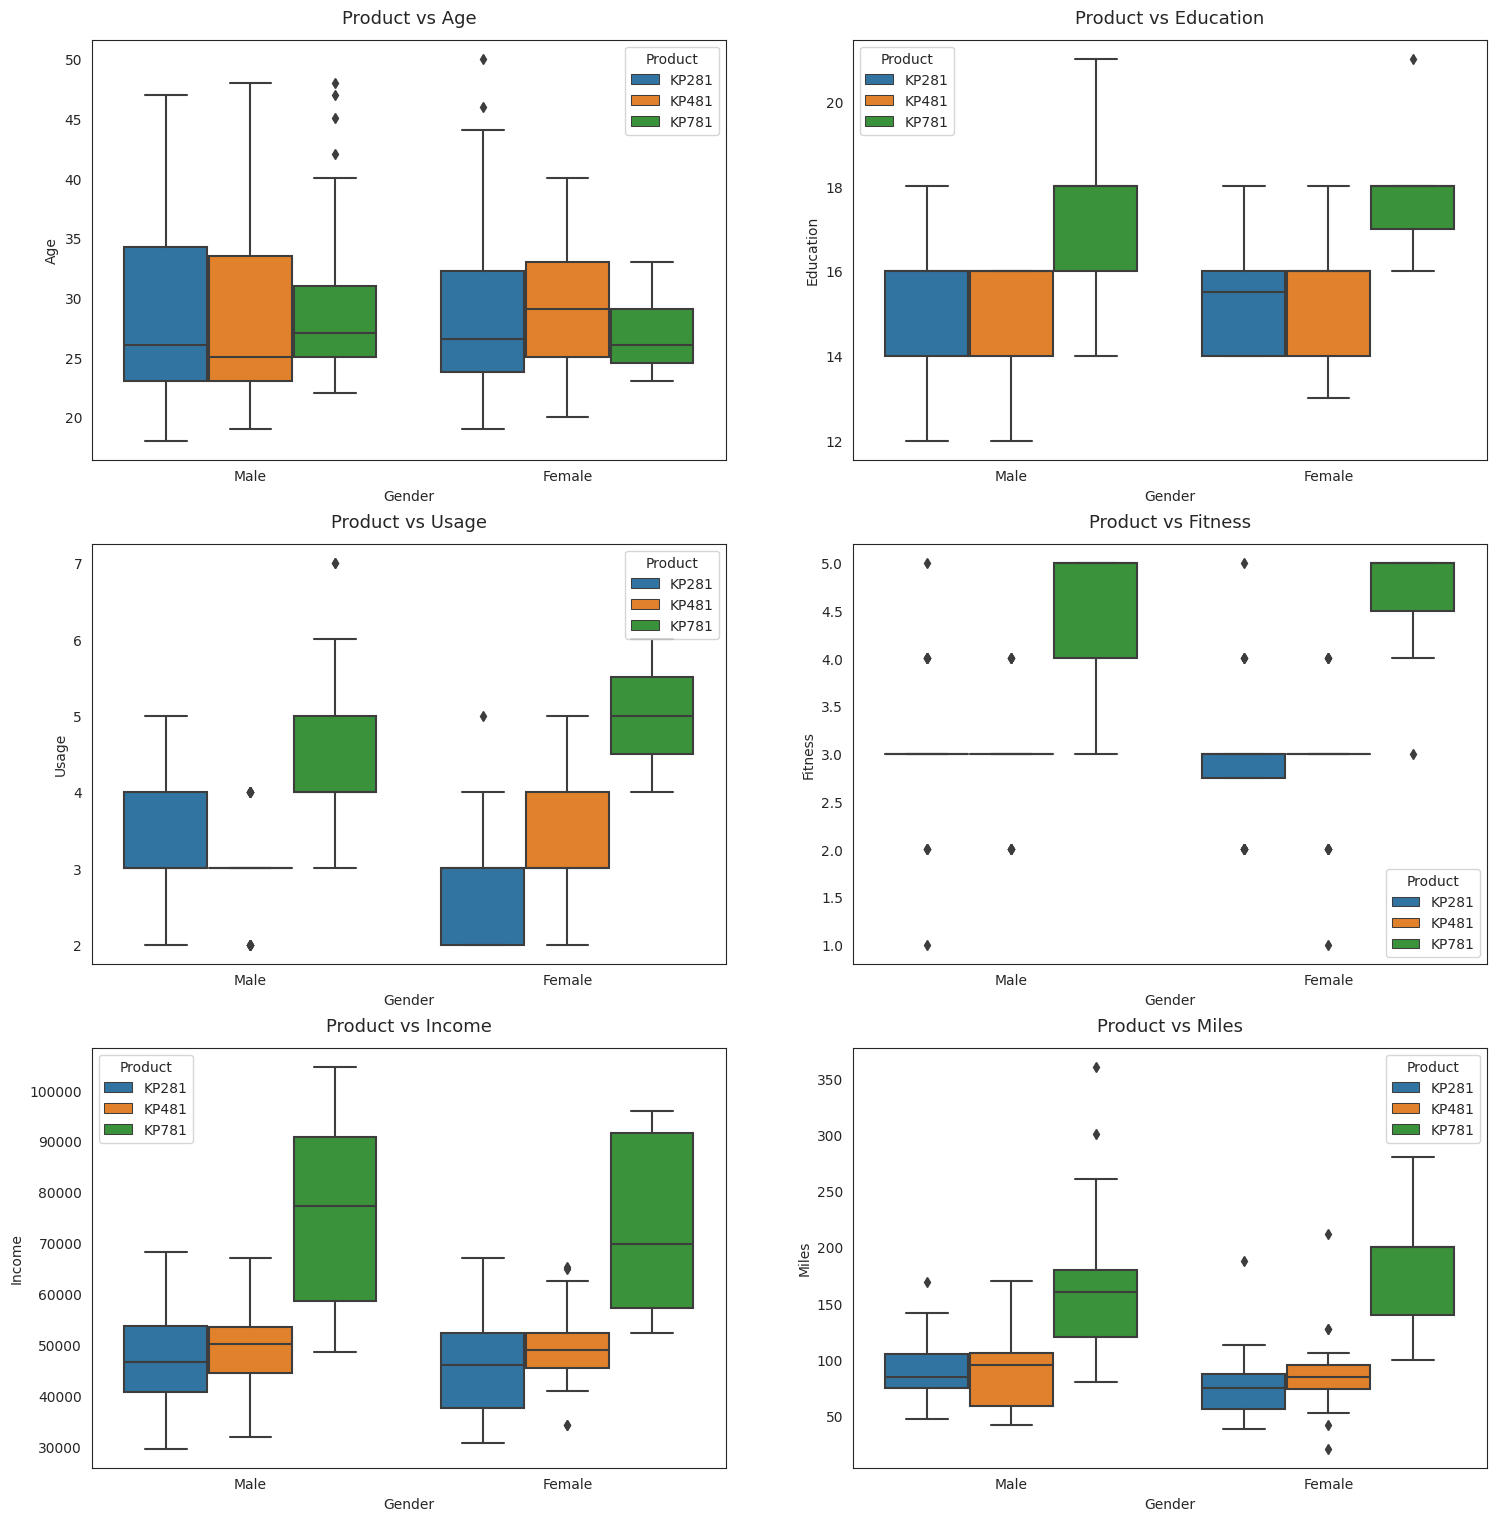

In [ ]:
attrs3 = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1.3)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df, x='Gender', y=attrs3[count], hue='Product', ax=axs[i,j])
        axs[i,j].set_title(f"Product vs {attrs3[count]}", pad=12, fontsize=13)
        count += 1

## Marginal & Conditional Probability

### Marginal Probabilities

In [ ]:
df['Product'].value_counts(normalize=True).round(2)

KP281    0.44
KP481    0.33
KP781    0.22
Name: Product, dtype: float64

In [ ]:
df['MaritalStatus'].value_counts(normalize=True).round(2)

Partnered    0.59
Single       0.41
Name: MaritalStatus, dtype: float64

### Conditional probabilities

#### Probability of each product given Gender

<Axes: xlabel='Product', ylabel='Gender'>

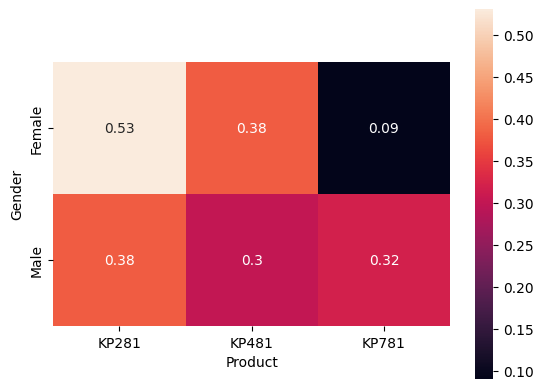

In [ ]:
ct1 = pd.crosstab(df.Gender, df.Product, normalize='index').round(2)
#ct1
sns.heatmap(ct1, annot=True, square=True)


- The probability of a Female customer buying a KP281 treadmill is 0.53
- The probability of a Female customer buying a KP481 treadmill is 0.38
- The probability of a Female customer buying a KP781 treadmill is 0.09
- The probability of a Male customer buying a KP281 treadmill is 0.38
- The probability of a Male customer buying a KP481 treadmill is 0.30
- The probability of a Male customer buying a KP781 treadmill is 0.32



#### Probability of each product given Marital Status

<Axes: xlabel='Product', ylabel='MaritalStatus'>

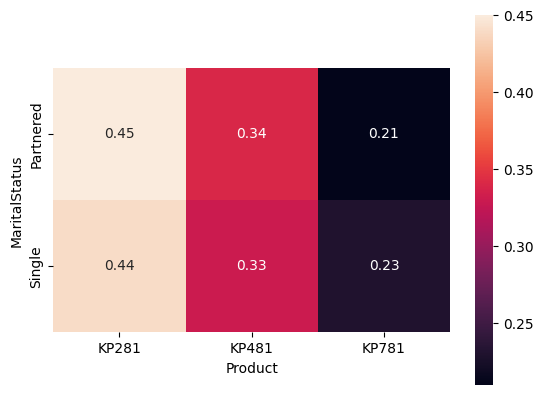

In [ ]:
ct2 = pd.crosstab(df.MaritalStatus, df.Product, normalize='index').round(2)
#ct2
sns.heatmap(ct2, annot=True, square=True)


- The probability of a Partnered customer buying a KP281 treadmill is 0.45
- The probability of a Partnered customer buying a KP481 treadmill is 0.34
- The probability of a Partnered customer buying a KP781 treadmill is 0.21
- The probability of a Single customer buying a KP281 treadmill is 0.44
- The probability of a Single customer buying a KP481 treadmill is 0.33
- The probability of a Single customer buying a KP781 treadmill is 0.23



#### Probability of each product given Age-Group

<Axes: xlabel='Product', ylabel='AgeGroup'>

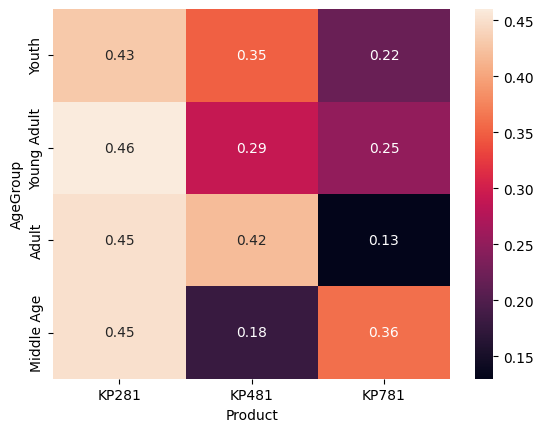

In [ ]:
ct3 = pd.crosstab(df.AgeGroup, df.Product, normalize='index').round(2)
#ct3
sns.heatmap(ct3, annot=True, square=False)


- The probability of a Youth customer buying a KP281 treadmill is 0.43
- The probability of a Youth customer buying a KP481 treadmill is 0.35
- The probability of a Youth customer buying a KP781 treadmill is 0.22
- The probability of a Young Adult customer buying a KP281 treadmill is 0.46
- The probability of a Young Adult customer buying a KP481 treadmill is 0.29
- The probability of a Young Adult customer buying a KP781 treadmill is 0.25
- The probability of an Adult customer buying a KP281 treadmill is 0.45
- The probability of an Adult customer buying a KP481 treadmill is 0.42
- The probability of an Adult customer buying a KP781 treadmill is 0.13
- The probability of a Middle Age customer buying a KP281 treadmill is 0.45
- The probability of a Middle Age customer buying a KP481 treadmill is 0.18
- The probability of a Middle Age customer buying a KP781 treadmill is 0.36

#### Probability of each product given Income-Group

<Axes: xlabel='Product', ylabel='IncomeGroup'>

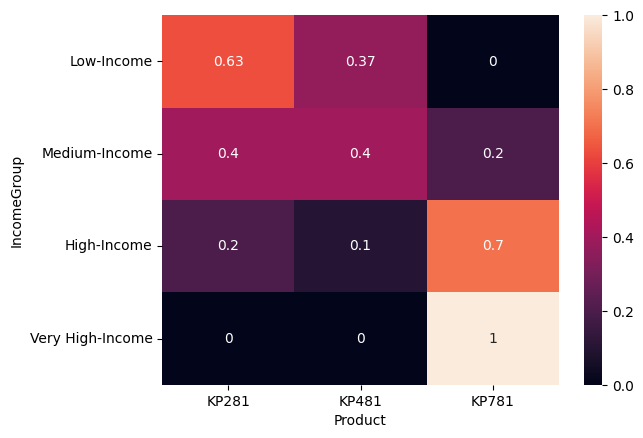

In [ ]:
ct4 = pd.crosstab(df.IncomeGroup, df.Product, normalize='index').round(3)
ct4
sns.heatmap(ct4, annot=True, square=False)


- The probability of a low-income person choosing product KP281 is 0.63, choosing product KP481 is 0.37, and choosing product KP781 is 0.0.
- The probability of a medium-income person choosing product KP281 is 0.40, choosing product KP481 is 0.40, and choosing product KP781 is 0.2.
- The probability of a high-income person choosing product KP281 is 0.20, choosing product KP481 is 0.10, and choosing product KP781 is 0.7.
- The probability of a very high-income person choosing product KP281 is 0.00, choosing product KP481 is 0.00, and choosing product KP781 is 1.0.

#### Probability of each product given Gender & Marital Status

<Axes: xlabel='Product', ylabel='Gender-MaritalStatus'>

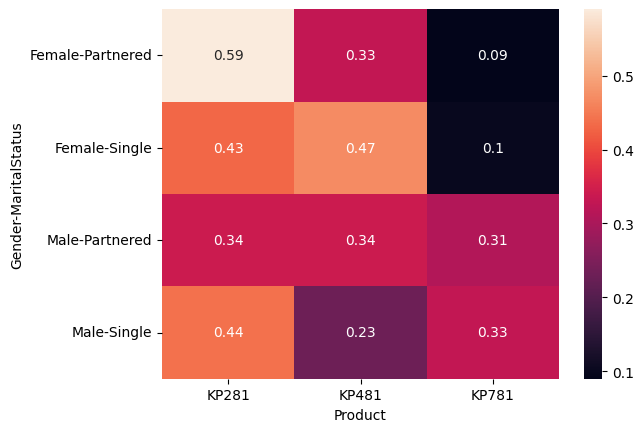

In [ ]:
ct5 = pd.crosstab([df.Gender,df.MaritalStatus],df.Product, normalize='index').round(2)
#ct5
sns.heatmap(ct5, annot=True, square=False)

- Female-Partnered customers are more likely to purchase KP281
- Female-Single, Male-Partnered customers are more likely to purchase KP481
- Male Partnered, Male Single customers are more likely to purchase KP781

#### Probability of each product given Gender & Income Group

<Axes: xlabel='Product', ylabel='Gender-IncomeGroup'>

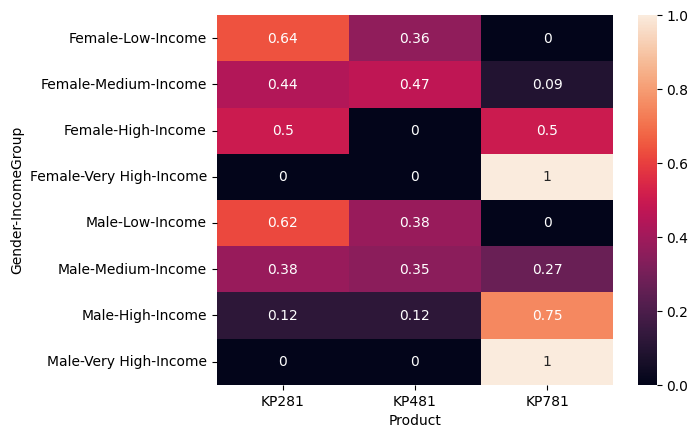

In [ ]:
ct6 = pd.crosstab([df.Gender,df.IncomeGroup],df.Product, normalize='index').round(2)
#ct6
sns.heatmap(ct6, annot=True, square=False)

- Males and Females belonging to low-income group are more likely to purchase KP281
- Females belonging to Medium-Income group are more likey to purchase KP481
- People irrespective of gender, belonging to Very-High Income Group are most likely to purchase KP781

#### Probability of each product given Gender & Age Group

<Axes: xlabel='Product', ylabel='Gender-AgeGroup'>

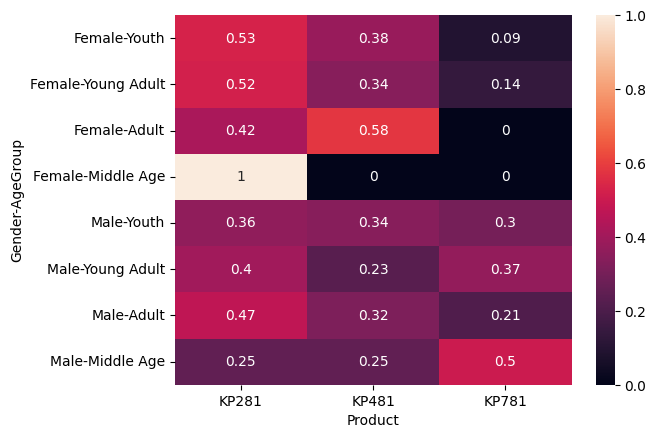

In [ ]:
ct7 = pd.crosstab([df.Gender,df.AgeGroup],df.Product, normalize='index').round(2)
# ct7
sns.heatmap(ct7, annot=True, square=False)

- For product KP281, the highest probability is among "Female-Middle Age" with a value of 1

- For product KP481, Adult Females are more likely to purchase

- For product KP781, Male-Middle Age people are likey to purcahse with a probability of 0.5



## Customer Profiling

- **KP281**

  - 44.4% of customers purchased the KP281 model, making it the most popular model.
  - The average customer income is 46K, and most customers who bought this treadmill have an income less than 60K, with an average of 55K.
  - There are equal numbers of male and female customers for this model, indicating that it is not gender specific.
  - The average age of customers who purchased the KP281 model is 28.5, with a median of 26.
  - The average years of education of customers is 15, and the median is 16, assuming it to be a bachelor's degree.
  - The self-rated fitness level of customers is average, and they expect to use the treadmill 3-4 times a week.

  This model accounted for 44.4% of sales, and it seems to appeal to customers with lower income who are looking for an affordable and basic treadmill. The majority of customers who purchased this model are partnered females and single males, compared to single females and partnered males. This may be due to the features and cost of the treadmill.


- **KP481**

  - This model was sold more than the KP781 model.
  - The average income of customers is 48,973, which is similar to the KP281 model.
  - The average age of customers who purchased the KP481 model is 28.9, with a median of 26. The customer range is between 24-33.
  - The average years of education of customers is 16, assuming it to be a bachelor's degree.
  - The expected usage is less frequent than the KP781 model, but the expected miles to run per week are higher.

  This model accounted for 33% of sales, and it was the second most sold model. It may have some feature differences from the KP281 model that attract customers with lower income. Single female customers bought the KP481 model more than single male customers, which may suggest a gender preference.


- **KP781**

  - The average age of customers who purchased the KP781 model is 29, with a median of 27. There are some outliers, suggesting that we need to explore more closely customers who are above 40 for any possibility of new customers.
  - The average education level is 17, and the median is 18, suggesting that they have some advanced education.
  - The expected usage is 4-5 days a week, and the expected miles to run per week are on average 166, with a median of 160.
  - The average income is 75K, and the median is 76K, which is much higher than the other two models.
  - The product made only 22% of sales.

  This treadmill seems to be more popular with customers who have high income and partnered male customers. This may be because it is more expensive than the other two models and has some advanced features. Customers who buy this model are more serious about fitness or professionals who are looking for an upgrade from their existing treadmill model. Customers' self-rated fitness is between 3-5, and they expect to use the treadmill more than four days a week.

## Conclusions

- 44.4% of customers purchased the KP281 model, making it the most popular model. The KP481 model was purchased more than the KP781 model.
- 57.8% of treadmill customers are male, meaning there are more male customers than female customers.
- 59.4% of customers who purchased a treadmill are in a partnership.
- On average, male customers use the treadmill more than female customers.
- Treadmill customers tend to be young, with an average age of 28, a median age of 26, and a mode age of 25.
- Most customers earn less than 70K and are in the lower pay range.
- The average education level is 16, with a median of 18.

## Recommendations

- **KP281**

  - This product is the most popular and affordable model, and it appeals to customers with lower income who are looking for a basic treadmill. It may be beneficial to market this product as a starter treadmill or a budget-friendly option for fitness enthusiasts.
  - Since this product has equal numbers of male and female customers, it may be wise to use gender-neutral advertising and avoid stereotyping. The product features should highlight the simplicity and ease of use of the treadmill, as well as the benefits of regular exercise.
  - The product may also attract customers who are younger and have less education, so the marketing strategy should be tailored to their preferences and needs. For example, using social media platforms, influencers, or testimonials from satisfied customers may be effective ways to reach this segment.

- **KP481**

  - This product is the second most sold model, and it has some feature differences from the KP281 model that may appeal to customers with lower income. It may be useful to emphasize these features and how they can enhance the customer's fitness experience and goals.
  - Since this product has more single female customers than single male customers, it may be advantageous to use female-oriented advertising and messaging. The product features should highlight the safety, comfort, and convenience of the treadmill, as well as the potential for weight loss or toning.
  - The product may also appeal to customers who are younger and have a bachelor's degree, so the marketing strategy should be aligned with their interests and values. For example, using online platforms, blogs, or podcasts that focus on health, wellness, or lifestyle topics may be effective ways to reach this segment.

- **KP781**

  - This product is the least sold model, but it has the highest income and education level of customers. It may be beneficial to market this product as a premium or luxury treadmill that offers advanced features and performance for fitness professionals or enthusiasts.
  - Since this product has more partnered male customers than partnered female customers, it may be advantageous to use male-oriented advertising and messaging. The product features should highlight the quality, durability, and innovation of the treadmill, as well as the potential for improving fitness or athletic performance.
  - The product may also attract customers who are older and have some advanced education, so the marketing strategy should be tailored to their preferences and needs. For example, using print media, magazines, or newsletters that focus on fitness, sports, or business topics may be effective ways to reach this segment.




---




